In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [2]:
IMG_HEIGHT = 64
IMG_WIDTH = 64
DEPTH = 3

train_datagen = ImageDataGenerator(rescale = 1./255,
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2,
    zoom_range=0.2, horizontal_flip=True,
    fill_mode="nearest")

In [3]:
training_set = train_datagen.flow_from_directory('Cotton Disease/train',
                                                 color_mode = "rgb",
                                                 shuffle = True,
                                                 seed = 42,
                                                 target_size=  (IMG_HEIGHT, IMG_WIDTH),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [4]:
val_datagen = ImageDataGenerator(rescale = 1./255)
val_set = val_datagen.flow_from_directory('Cotton Disease/val',
                                            color_mode = "rgb",
                                            shuffle = True,
                                            seed =42,
                                            target_size = (IMG_HEIGHT, IMG_WIDTH),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 253 images belonging to 4 classes.


In [5]:
cnn = Sequential()
cnn.add(Conv2D(filters=32, padding='same',kernel_size=3, activation='relu', input_shape=[64,64,3]))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Conv2D(filters=32, padding='same',kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Conv2D(filters=32, padding='same',kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=4, activation='softmax'))

In [6]:
cnn.compile(optimizer='adam',
                        loss=tf.keras.losses.CategoricalCrossentropy(),
                        metrics=['accuracy'])

In [7]:
model = cnn.fit(
  training_set,
  validation_data=val_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)


Epoch 1/10
61/61 [==============================] - 51s 789ms/step - loss: 1.1667 - accuracy: 0.4931 - val_loss: 0.9795 - val_accuracy: 0.6324
Epoch 2/10
61/61 [==============================] - 43s 698ms/step - loss: 0.8797 - accuracy: 0.6545 - val_loss: 0.7599 - val_accuracy: 0.6759
Epoch 3/10
61/61 [==============================] - 44s 715ms/step - loss: 0.7218 - accuracy: 0.6945 - val_loss: 0.7820 - val_accuracy: 0.7273
Epoch 4/10
61/61 [==============================] - 42s 682ms/step - loss: 0.6296 - accuracy: 0.7499 - val_loss: 0.4979 - val_accuracy: 0.8024
Epoch 5/10
61/61 [==============================] - 37s 614ms/step - loss: 0.5120 - accuracy: 0.8006 - val_loss: 0.3382 - val_accuracy: 0.8696
Epoch 6/10
61/61 [==============================] - 37s 610ms/step - loss: 0.5211 - accuracy: 0.7970 - val_loss: 0.3453 - val_accuracy: 0.8814
Epoch 7/10
61/61 [==============================] - 38s 620ms/step - loss: 0.4494 - accuracy: 0.8288 - val_loss: 0.2803 - val_accuracy: 0.8933

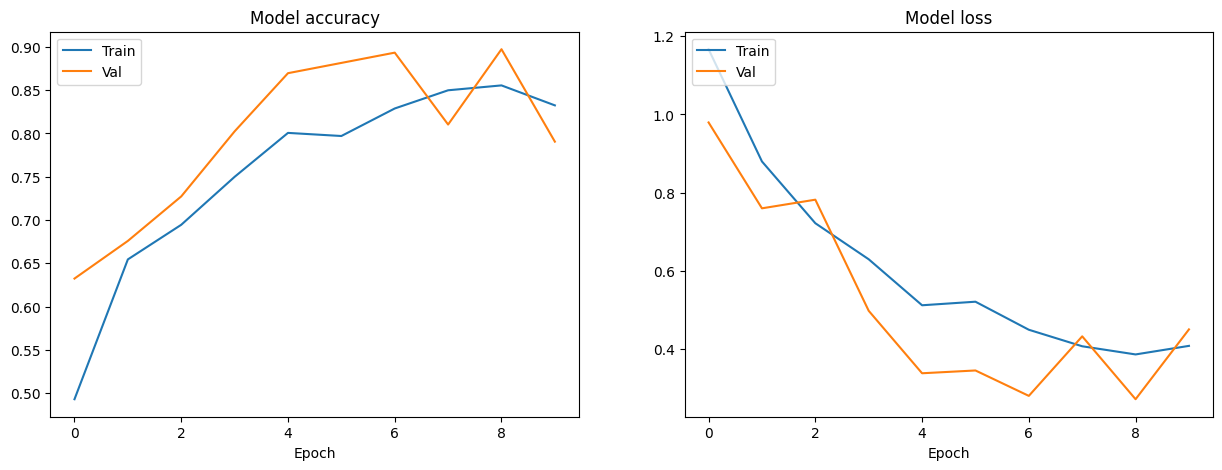

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axs[0].plot(model.history['accuracy'])
axs[0].plot(model.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].legend(['Train', 'Val'], loc='upper left')

axs[1].plot(model.history['loss'])
axs[1].plot(model.history['val_loss'])
axs[1].set_title('Model loss')
axs[1].legend(['Train', 'Val'], loc='upper left')

for ax in axs.flat:
    ax.set(xlabel='Epoch')

In [9]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = val_datagen.flow_from_directory('Cotton Disease/test',
                                            color_mode = "rgb",
                                            shuffle = True,
                                            seed =42,
                                            target_size = (IMG_HEIGHT, IMG_WIDTH),
                                            #batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [10]:
print("[INFO]Calculating model accuracy")
test_loss, test_acc = model.evaluate(test_set)
print(f"Test Accuracy: {scores[1]}")

[INFO]Calculating model accuracy


AttributeError: 'History' object has no attribute 'evaluate'

In [12]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 32)         0

In [11]:
class_names={0:'diseased cotton leaf',1:'diseased cotton plant',2:'fresh cotton leaf',3:'fresh cotton plant'}

In [13]:
test_results=model.evaluate(test_data)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

AttributeError: 'History' object has no attribute 'evaluate'

In [17]:
import numpy as np
pred=cnn.predict(test_set)
y_pred_classes = [np.argmax(element) for element in pred]
y_pred_classes[:20]

4/4 [==============================] - 7s 2s/step


[1, 1, 0, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0]

In [18]:
def predict(image_path):
    test_image=image.load_img(image_path, target_size =(img_size,img_size) )
    plt.imshow(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    preds=np.argmax(model.predict(test_image))
    print(class_names[preds])

In [21]:
test_image=image.load_img('Cotton Disease/test/diseased cotton leaf/dis_leaf (153)_iaip.jpg', target_size = (224,224))
test_image = np.expand_dims(test_image, axis = 0)
test_image.shape

(1, 224, 224, 3)

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
test_labels = test_set.classes
test_labels
print(classification_report(test_labels, y_pred_classes))

              precision    recall  f1-score   support

           0       0.25      0.24      0.24        25
           1       0.27      0.46      0.34        28
           2       0.33      0.31      0.32        26
           3       0.33      0.11      0.17        27

    accuracy                           0.28       106
   macro avg       0.30      0.28      0.27       106
weighted avg       0.30      0.28      0.27       106



# Transfer Learning